In [797]:
import torch
import esm
import re
from tqdm import tqdm
import numpy as np
import pandas as pd

import benchmark_esm as besm
import benchmark_config as cfg
import h5py


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [785]:
SEQTHRES = 1022

In [844]:
SEQTHRES = 1022
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()
batch_converter = alphabet.get_batch_converter()
if torch.cuda.is_available():
        model = model.cuda()
        print("Transferred model to GPU")
test = pd.read_feather(cfg.DATADIR+'test.feather').iloc[1:10,:6]

rep0, rep32, rep33 = besm.get_rep_multi_sequence(sequences=test, seqthres=SEQTHRES)
rep0.to_feather(cfg.DATADIR + 'rep0.feather')
rep32.to_feather(cfg.DATADIR + 'rep32.feather')
rep33.to_feather(cfg.DATADIR + 'rep33.feather')

Transferred model to GPU


 44%|████▍     | 4/9 [00:00<00:00, 37.81it/s]

Transferred model to GPU


100%|██████████| 9/9 [00:00<00:00, 37.53it/s]


ValueError: feather must have string column names

In [850]:
rep0.columns = rep0.columns.astype(str)
rep0.to_feather(cfg.DATADIR + 'rep0.feather')

In [846]:
rep0.columns = col_name

In [845]:
col_name = ['id']+ ['f'+str(i) for i in range (1,rep0.shape[1])]

In [849]:
rep0.id[0]

'P0DQF6'

In [843]:
rep32.id[0]

array('P0DQF6', dtype='<U6')

In [833]:
rep0

id        f1        f2        f3        f4        f5        f6  \
0  P0DQF6 -0.259471  0.006949 -0.005433  0.006586 -0.021347 -0.083562   
1  P0DQF5 -0.150133  0.001781  0.026919  0.030881 -0.009955  0.019808   
2  P0DQF4 -0.217387 -0.002270  0.006749  0.010384 -0.010850  0.020561   
3  P0DQF3 -0.214314  0.003151 -0.019617 -0.006829 -0.024394 -0.134051   
4  P0DQF2 -0.226803 -0.001599 -0.016486 -0.001139 -0.024738 -0.106405   
5  P0DQF1 -0.195973  0.024525 -0.018392 -0.001749 -0.023355 -0.071169   
6  P0DQF0 -0.129941  0.017863  0.029848  0.032939 -0.005177  0.039215   
7  P0DQE9 -0.148601  0.036352  0.022203  0.022205 -0.012111  0.063528   
8  P0DQF7 -0.260200  0.003425  0.015632  0.012367 -0.014155  0.055600   

         f7        f8        f9  ...     f1271     f1272     f1273     f1274  \
0  0.032025  0.057283 -0.018245  ...  0.084166 -0.110687  0.005254  0.077390   
1  0.063223 -0.153883 -0.010599  ...  0.073452 -0.079019 -0.019150  0.070225   
2  0.055597  0.018115 -0.015178  ...  0.079510 -0.077334 -0.002126  0.089443   
3  0.035427 -0.003379 -0.028459  ...  0.057209 -0.096265  0.011923  0.070451   
4  0.020430  0.009826 -0.022071  ...  0.059827 -0.103491  0.009483  0.082919   
5  0.098329 -0.011192 -0.025702  ...  0.061635 -0.094600  0.001596  0.066638   
6  0.043362  0.002801 -0.009617  ...  0.022925 -0.070307 -0.012396  0.073635   
7  0.001887  0.014415 -0.017600  ...  0.007611 -0.066099 -0.025927  0.054972   
8  0.052714 -0.056896 -0.013206  ...  0.073169 -0.092696 -0.017189  0.065884   

      f1275     f1276     f1277     f1278     f1279     f1280  
0 -0.010777  0.103296  0.032806 -0.004789 -0.064585  0.132888  
1 -0.017592  0.115029  0.018628  0.006268  0.023454  0.075056  
2 -0.000566  0.087724  0.023276  0.001338  0.018694  0.105279  
3  0.040713  0.082913  0.017986  0.004159 -0.045470  0.128421  
4  0.042206  0.075399  0.016824  0.001285 -0.055336  0.132884  
5  0.003913  0.126879  0.030047  0.000011 -0.062666  0.121332  
6 -0.018923  0.071431  0.023677  0.005925  0.032839  0.042846  
7 -0.000176  0.120781  0.015717  0.007824  0.060579  0.033947  
8 -0.022981  0.135834  0.042005  0.003168  0.045258  0.079542  

[9 rows x 1281 columns]

In [852]:
x6 = torch.load(cfg.DATADIR +'esm_rep/P0DQF6.pt')
x6

{'label': 'P0DQF6',
 'mean_representations': {0: tensor([-0.2595,  0.0069, -0.0054,  ..., -0.0048, -0.0646,  0.1329]),
  32: tensor([0.8588, 2.5509, 1.2437,  ..., 3.5111, 6.1672, 2.1161]),
  33: tensor([0.0351, 0.1554, 0.1030,  ..., 0.1050, 0.0888, 0.0770])}}

In [753]:
sq ="AVIYYRFRSQKPDHIATIKFDGTGLTVFELKRDIILANNLLHSTDVDIVLYSTEDIQDTKSWGYQNGGSATNGDEDDMIKKMFSVQDEQWSQQQDVMATATRVDNFRTNVNEPVPEYYICYKCGEKGKHHIKNCPKNNDPNWEGVRVRKTTGIPKSHLKAIENPEDTIRDSNSSGNTTYMVNDEGKYVVAVADTKAWEKYQKTKKGESGGYLNGDVDVDDG\
ELKDPETGKLWKSPVRIPCCNKIFSRKIIEDKLIDSDFTCPSCGKEQIYLDTLVADEELQAKVDEYVKNLSENKNNDGNSPKRRQVNPAGATANTSQLPQIPMMPMPPINMQMPPMNIGMPPFMPFMPMPGMNPAVIYYRFRSQKPDHIATIKFDGTGLTVFELKRDIILANNLLHSTDVDIVLYSTEDIQDTKSWGYQNGGSSSAGERELDDDNEVVPRSTTVLVR\
RTMTPKKNKGNVQRYVAGKPRLQVSGTNSVNKSISLGNNVGGTMNFGDAATNGDEDDMIKKMFSVQDEQWSQQQDVMATATRVDNFRTNVNEPVPEYYICYKCGEKGKHHIKNCPKNNDPNWEGVRVRKTTGIPKSHLKAIENPEDTIRDSNSSGNTTYMVNDEGKYVVAVADTKAWEKYQKTKKGESGGYLNGDVDVDDGELKDPETGKLWKSPVRIPCCNKIFSRK\
IIEDKLIDSDFTCPSCGKEQIYLDTLVADEELQAKVDEYVKNLSENKNNDGNSPKRRQVNPAGATANTSQLPQIPMMPMPPINMQMPPMNIGMPPFMPFMPMPGMNPAVIYYRFRSQKPDHIATIKFDGTGLTVFELKRDIILANNLLHSTDVDIVLYSTEDIQDTKSWGYQNGGSSSAGERELDDDNEVVPRSTTVLVRRTMTPKKNKGNVQRYVAGKPRLQVSGTNSVNKSISLGNNVGGTMNFGDAATNGDEDDMIKKMFSVQDEQWSQQ"

In [777]:
def get_rep_single_seq(seqid, sequence):
    
    if len(sequence) < SEQTHRES:
        data =[(seqid, sequence)]
    else:
        seqArray = cut_text(sequence, SEQTHRES)
        data=[]
        for item in seqArray:
            data.append((seqid, item))
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    
    if torch.cuda.is_available():
        batch_tokens = batch_tokens.to(device="cuda", non_blocking=True)
        
    REP_LAYERS = [0, 32, 33]    
    MINI_SIZE = len(batch_labels)
    
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=REP_LAYERS, return_contacts=False)    
    

    representations = {layer: t.to(device="cpu") for layer, t in results["representations"].items()}
    result={}
    result["label"] = batch_labels[0]

    for i in range(MINI_SIZE):
        if i ==0:
            result["mean_representations"] = {layer: t[i, 1 : len(batch_strs[0]) + 1].mean(0).clone() for layer, t in representations.items()}
        else:
            for index, layer in enumerate(REP_LAYERS):
                result["mean_representations"][layer] += {layer: t[i, 1 : len(batch_strs[0]) + 1].mean(0).clone() for layer, t in representations.items()}[layer]

    for index, layer in enumerate(REP_LAYERS):
        result["mean_representations"][layer] = result["mean_representations"][layer] /MINI_SIZE
    
    return result

In [778]:
apd = get_rep_single_seq(seqid = 'aeq', sequence=seq2) 

In [779]:
final_label_list.append(apd['label'])
final_rep0.append(np.array(apd['mean_representations'][0]))
final_rep32.append(np.array(apd['mean_representations'][32]))
final_rep33.append(np.array(apd['mean_representations'][33]))

In [765]:
seq2

'AVIYYRFRSQKPDHIATIKFDGTGLVFELKRDIILANNLLHSTDVDIVLYSTEDIQDTKSWGTVFELKRDIILANNLLSTEDIQDTKSWGTVFELKRDIILHSTDVDIVLYSTEDIQDTKSWGYQNGGSSSAGERELDDDNEVVPRSTTVLVRRTMTPKKNKGNVQRYVAGKPRLQVSGTNSVNKSISLGNNVGGTMNFGDAATNGDEDDNFRTNVNEPVPEYYICYKCGEKGKHHIKNCPKNNDPNWEGVRVRKTTGIPKSHLKAIENPEDTIRDSNSSGNTTYMVNDEGKYVVAVADTKAWEKYQKTKKGESGGYLNGDVDVDDGELKDPETGKLWKSPVRIPCCNKIFSRKIIEDKLIDSDFTCPSCGKEQIYLDTLVADEELQAKVDEYVKNLSENKNNDGNSPKRRQVNPAGATANTSQLPQIPMMPMPPINMQMPPMNIGMPPFMPFMPMPGMNPAVIYYRFRSQKPDHIATIKFDGTGLTVFELKRDIILANNLLHSTDVDIVLYSTEDIQDTKSWGYQNGGSSSAGERELDDDNEVVPRSTTVLVRRTMTPKKNKGNVQRYVAGKPRLQVSGTNSVNKSISLGNNVGGTMNFGDAATNGDEDDMIKKMFSVQDEQWSQQQDVMATATRVDNFRTNVNEPVPEYYICYKCGEKGKHHIKNCPKNNDPNWEGVRVRKTTGIPKSHLKAIENPEDTIRDSNSSGNTTYMVNDEGKYVVAVADTKAWEKYQKTKKGESGGYLNGDVDVDDGELKDPETGKLWKSPVRIPCCNKIFSRKIIEDKLIDSDFTCPSCGKEQIYLDTLVADEELQAKVDEYVKNLSENKNNDGNSPKRRQVNPAGATANTSQLPQIPMMPMPPINMQMPPMNIGMPPFMPDMIKKMFSVQDEQWSQQQDVMATATRVDNFRTNVNEPVPEYYICYKCGEKGKHHIKNCPKNNDPNWEGVRVRKTTGIPKSHLKAIENPEDTIRDSNSSGNTTYMVNDEGKYVVAVADTK

In [780]:
pd.DataFrame(final_rep32)

0         1         2         3         4         5         6     \
0  13.342666 -6.065397 -7.653386 -0.206877  3.412858  8.580017 -4.474588   
1  13.342666 -6.065397 -7.653386 -0.206877  3.412858  8.580017 -4.474588   
2  13.342666 -6.065397 -7.653386 -0.206877  3.412858  8.580017 -4.474588   
3   8.866100 -8.275290 -7.363873  0.169422 -0.941267  3.683374 -4.503125   
4   8.866100 -8.275290 -7.363873  0.169422 -0.941267  3.683374 -4.503125   

       7          8         9     ...       1270      1271      1272  \
0  7.195158 -15.528293  3.261242  ...  26.182968  9.536174 -0.349252   
1  7.195158 -15.528293  3.261242  ...  26.182968  9.536174 -0.349252   
2  7.195158 -15.528293  3.261242  ...  26.182968  9.536174 -0.349252   
3  7.027940 -10.004908  3.117211  ...  19.919933  9.000986 -0.117662   
4  7.027940 -10.004908  3.117211  ...  19.919933  9.000986 -0.117662   

       1273       1274      1275      1276       1277      1278      1279  
0  2.056357 -38.834545 -5.067162 -4.019046 -13.059695  5.651593  9.056581  
1  2.056357 -38.834545 -5.067162 -4.019046 -13.059695  5.651593  9.056581  
2  2.056357 -38.834545 -5.067162 -4.019046 -13.059695  5.651593  9.056581  
3  4.793332 -25.503050 -1.988137 -3.524633 -11.511133  5.617582  5.462593  
4  4.793332 -25.503050 -1.988137 -3.524633 -11.511133  5.617582  5.462593  

[5 rows x 1280 columns]

In [747]:
batch_labels, batch_strs, batch_tokens = batch_converter(data)
if torch.cuda.is_available():
    batch_tokens = batch_tokens.to(device="cuda", non_blocking=True)
    
REP_LAYERS = [0, 32, 33]    
MINI_SIZE = len(batch_labels)


with torch.no_grad():
    results = model(batch_tokens, repr_layers=REP_LAYERS, return_contacts=False)    
    

representations = {layer: t.to(device="cpu") for layer, t in results["representations"].items()}
result["label"] = batch_labels[0]

for i in range(MINI_SIZE):
    if i ==0:
        result["mean_representations"] = {layer: t[i, 1 : len(batch_strs[0]) + 1].mean(0).clone() for layer, t in representations.items()}
    else:
        for index, layer in enumerate(REP_LAYERS):
            result["mean_representations"][layer] += {layer: t[i, 1 : len(batch_strs[0]) + 1].mean(0).clone() for layer, t in representations.items()}[layer]

for index, layer in enumerate(REP_LAYERS):
    result["mean_representations"][layer] = result["mean_representations"][layer] /MINI_SIZE

print(result)
apd = result.copy()


final_label_list.append(apd['label'])
final_rep0.append(np.array(apd['mean_representations'][0]))
final_rep32.append(np.array(apd['mean_representations'][32]))
final_rep33.append(np.array(apd['mean_representations'][33]))


{'label': 'UniRef50_A0A1E3NP16', 'mean_representations': {0: tensor([-0.0515, -0.0002,  0.0142,  ...,  0.0084, -0.0568,  0.0050]), 32: tensor([ 13.3427,  -6.0654,  -7.6534,  ..., -13.0597,   5.6516,   9.0566]), 33: tensor([ 0.0794,  0.0563, -0.1215,  ..., -0.3369, -0.0463,  0.0283])}}


In [730]:
final_label_list

['UniRef50_A0A1E3NP16', 'UniRef50_A3', 'UniRef50_A3']

In [741]:
final_rep0

[tensor([-0.0515, -0.0002,  0.0142,  ...,  0.0084, -0.0568,  0.0050]),
 tensor([-0.0501,  0.0044,  0.0191,  ...,  0.0071, -0.0537,  0.0050])]

In [742]:
final_rep32

[tensor([ 13.3427,  -6.0654,  -7.6534,  ..., -13.0597,   5.6516,   9.0566]),
 tensor([ 12.5109,  -6.3972,  -7.8671,  ..., -13.4140,   5.7848,  10.0745])]

In [618]:
aa

[[[1, 2]]]

In [461]:
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=False)

In [479]:
results['representations'][0]

tensor([[[-0.0663, -0.0206,  0.0212,  ...,  0.0336,  0.3534,  0.3684],
         [-0.2066, -0.0061,  0.0463,  ..., -0.0319, -0.0615,  0.2085],
         [ 0.8343,  0.0187, -0.0447,  ..., -0.0452, -0.1219, -0.0422],
         ...,
         [ 0.4026, -0.0325,  0.0259,  ...,  0.0369,  0.6076,  0.1466],
         [-0.0122, -0.0720, -0.1022,  ..., -0.1141, -0.3044,  0.1429],
         [-0.1295, -0.0159,  0.0496,  ..., -0.0041,  0.1682,  0.1169]],

        [[-0.0663, -0.0206,  0.0212,  ...,  0.0336,  0.3534,  0.3684],
         [ 0.0339, -0.0038,  0.0843,  ...,  0.0500,  0.5864,  0.0536],
         [ 0.9680,  0.0220,  0.0074,  ...,  0.0210,  0.6507, -0.0980],
         ...,
         [-0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.0000,  0.0000],
         [-0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.0000,  0.0000]]],
       device='cuda:0')

In [133]:
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [178]:
token_representations

{0: tensor([[[-0.0663, -0.0206,  0.0212,  ...,  0.0336,  0.3534,  0.3684],
          [-0.2066, -0.0061,  0.0463,  ..., -0.0319, -0.0615,  0.2085],
          [ 0.8343,  0.0187, -0.0447,  ..., -0.0452, -0.1219, -0.0422],
          ...,
          [ 0.2840, -0.1333,  0.1209,  ...,  0.0703, -0.8344,  0.2684],
          [ 0.7176, -0.0639, -0.0037,  ...,  0.0431, -0.8247,  0.1954],
          [ 0.1696, -0.1269,  0.0770,  ...,  0.0481, -0.3639,  0.2169]]]),
 32: tensor([[[ -2.2953,   6.8251,   5.7695,  ...,   0.8377,   4.1287,  -3.2129],
          [-16.3774, -13.6198,  -1.1080,  ...,  -2.2141, -16.0993,  -8.8635],
          [  9.2567,   2.4502, -23.7310,  ...,  -1.7868,  -4.5171,  -3.2590],
          ...,
          [ 17.1359,  -6.9845, -18.2424,  ...,  10.0516, -30.6245,   8.1948],
          [  9.6938,  -7.7200, -13.8527,  ...,   7.0359,   4.3275,  19.5375],
          [-11.4744, -12.2053,   2.8143,  ...,  -5.0165,   7.0251,   1.5924]]]),
 33: tensor([[[-0.0148,  0.2114,  0.0959,  ...,  0.0192, 

In [135]:
result

{'label': 'UniRef50_A0A1E3NP16',
 'mean_representations': {0: tensor([-0.0879,  0.0045,  0.0343,  ...,  0.0030, -0.0245,  0.0647]),
  32: tensor([  2.7337,   2.4306,  -4.3924,  ...,   2.0815, -10.4405,   5.6199]),
  33: tensor([ 0.0354,  0.1763, -0.0611,  ...,  0.0219, -0.1569,  0.1682])}}

In [121]:
representations

{0: tensor([[[-0.0663, -0.0206,  0.0212,  ...,  0.0336,  0.3534,  0.3684],
          [-0.2066, -0.0061,  0.0463,  ..., -0.0319, -0.0615,  0.2085],
          [ 0.8343,  0.0187, -0.0447,  ..., -0.0452, -0.1219, -0.0422],
          ...,
          [ 0.2840, -0.1333,  0.1209,  ...,  0.0703, -0.8344,  0.2684],
          [ 0.7176, -0.0639, -0.0037,  ...,  0.0431, -0.8247,  0.1954],
          [ 0.1696, -0.1269,  0.0770,  ...,  0.0481, -0.3639,  0.2169]]]),
 32: tensor([[[ -2.2953,   6.8251,   5.7695,  ...,   0.8377,   4.1287,  -3.2129],
          [-16.3774, -13.6198,  -1.1080,  ...,  -2.2141, -16.0993,  -8.8635],
          [  9.2567,   2.4502, -23.7310,  ...,  -1.7868,  -4.5171,  -3.2590],
          ...,
          [ 17.1359,  -6.9845, -18.2424,  ...,  10.0516, -30.6245,   8.1948],
          [  9.6938,  -7.7200, -13.8527,  ...,   7.0359,   4.3275,  19.5375],
          [-11.4744, -12.2053,   2.8143,  ...,  -5.0165,   7.0251,   1.5924]]]),
 33: tensor([[[-0.0148,  0.2114,  0.0959,  ...,  0.0192, 

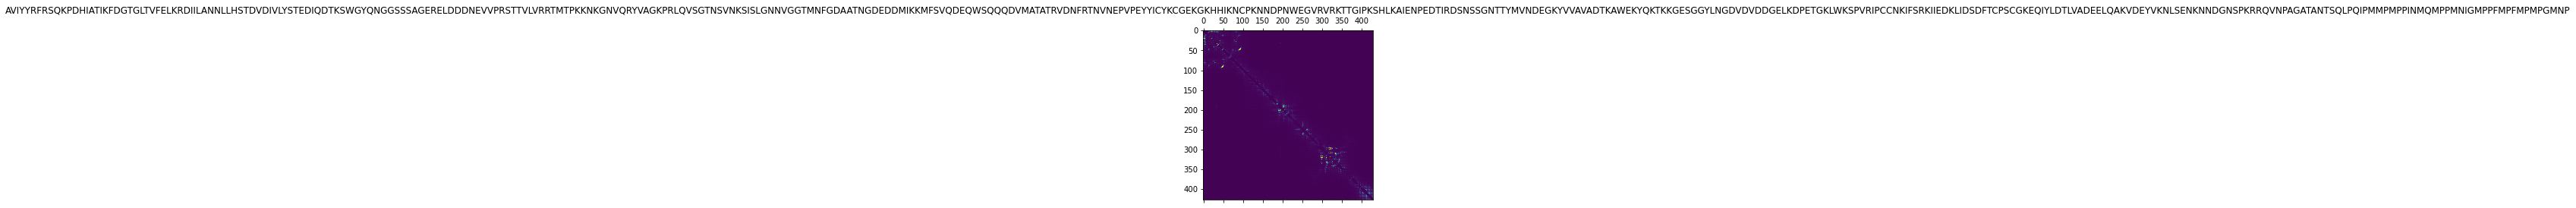

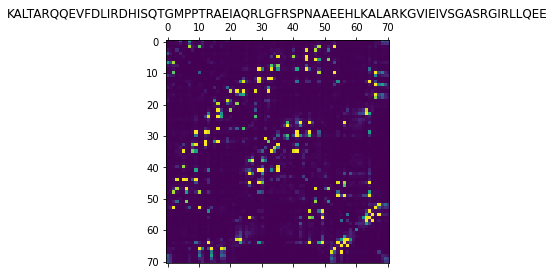

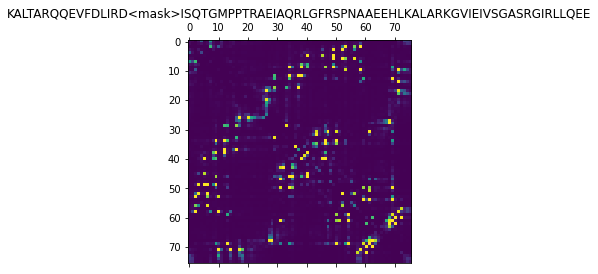

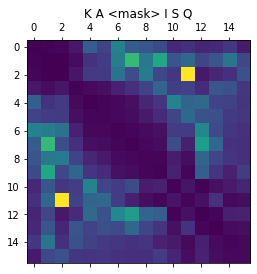

In [100]:
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()